<a href="https://colab.research.google.com/github/254-KIPSANG/vpython/blob/main/wikipedia_page.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def get_random_wikipedia_page():
    # URL of Wikipedia's random page feature
    random_url = "https://en.wikipedia.org/wiki/Special:Random"

    # Send a GET request to the random page URL
    response = requests.get(random_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the random page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the title of the random page
        title = soup.find('h1', id='firstHeading').text

        # Find the content of the random page (excluding navigation links, etc.)
        content = soup.find('div', class_='mw-parser-output').get_text()

        # Find the URL of the random page
        url = random_url

        # Find categories
        categories = [elem.text for elem in soup.find_all('div', class_='mw-normal-catlinks')[0].find_all('a')]

        # Find references
        references_tag = soup.find_all('ol', class_='references')
        references = [elem.text for elem in references_tag[0].find_all('li')] if references_tag else []

        # Find infobox data
        infobox_data = {}
        infobox_table = soup.find('table', class_='infobox')
        if infobox_table:
            rows = infobox_table.find_all('tr')
            for row in rows:
                header = row.find('th')
                if header:
                    header_text = header.text.strip()
                    data_cell = row.find('td')
                    if data_cell:
                        infobox_data[header_text] = data_cell.text.strip()

        # Find images
        images = [image['src'] for image in soup.find_all('img')]

        # Find sections/subsections
        sections = [section.text.strip() for section in soup.find_all('span', class_='mw-headline')]

        # Find links
        links = [link['href'] for link in soup.find_all('a', href=True)]

        # Find tables
        tables = [table.text.strip() for table in soup.find_all('table', class_='wikitable')]

        # Find metadata (author information, last updated timestamp, etc.)
        # Metadata is not directly available in the HTML and might require additional processing

        # Find language
        language = soup.find('html')['lang']

        # Return the title, content, URL, categories, references, infobox data, images, sections/subsections, links, tables, metadata, and language of the random page
        return title, content[:200], url, categories, references, infobox_data, images, sections, links, tables, None, language
    else:
        # If the request was not successful, print an error message
        print("Failed to retrieve a random Wikipedia page. Status code:", response.status_code)
        return None, None, None, None, None, None, None, None, None, None, None, None

# Number of Wikipedia pages to scrape
num_pages = 150

# List to store scraped data
data = []

# Scrape data from random Wikipedia pages
for _ in range(num_pages):
    title, content, url, categories, references, infobox_data, images, sections, links, tables, metadata, language = get_random_wikipedia_page()
    if title and content and url:
        data.append({
            'Title': title,
            'Content': content,
            'URL': url,
            'Categories': categories,
            'References': references,
            'Infobox Data': infobox_data,
            'Images': images,
            'Sections/Subsections': sections,
            'Links': links,
            'Tables': tables,
            'Metadata': metadata,
            'Language': language
        })
        print("Scraped:", title)
    else:
        print("Skipping this page...")
    # Introduce a delay between requests to reduce the load on Wikipedia's servers
    time.sleep(2)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('wikipedia_data_extended_150.csv', index=False)

print("Data saved to 'wikipedia_data_extended_150.csv'")


Scraped: Latoya Brulee
Scraped: Kathryn Hay
Scraped: Xue Er
Scraped: Chandigarh Kare Aashiqui
Scraped: Solar eclipse of December 4, 2021
Scraped: The Three Pioneers
Scraped: May Thit
Scraped: Kota Bharu (federal constituency)
Scraped: Tillandsia intermedia
Scraped: Itumeleng Ntsube
Scraped: Eelam People's Revolutionary Liberation Front
Scraped: Cherokee spiritual beliefs
Scraped: Andrew Laming
Scraped: Dieter Seebach
Scraped: Ami'oz
Scraped: 2008–09 in Turkish football
Scraped: Brandon Spikes
Scraped: Yann Demange
Scraped: German submarine U-2327
Scraped: Erkki Ertama
Scraped: Narenga
Scraped: Tereza Mrdeža
Scraped: Charlie Christodoulou
Scraped: Links Air
Scraped: Guercif Province
Scraped: David Rawnsley
Scraped: Kosmos 1806
Scraped: Papenburg station
Scraped: RUNX2
Scraped: Luis Alberto González
Scraped: 2023 Kozerki Open – Doubles
Scraped: WAES (FM)
Scraped: Sumorovac
Scraped: Heterachthes dimidiatus
Scraped: Villarejo de Montalbán
Scraped: Polavaram, Chittoor
Scraped: François Le F

In [73]:
#  check df columns

df.columns


Index(['Title', 'Content', 'URL', 'Categories', 'References', 'Infobox Data',
       'Images', 'Sections/Subsections', 'Links', 'Tables', 'Metadata',
       'Language'],
      dtype='object')

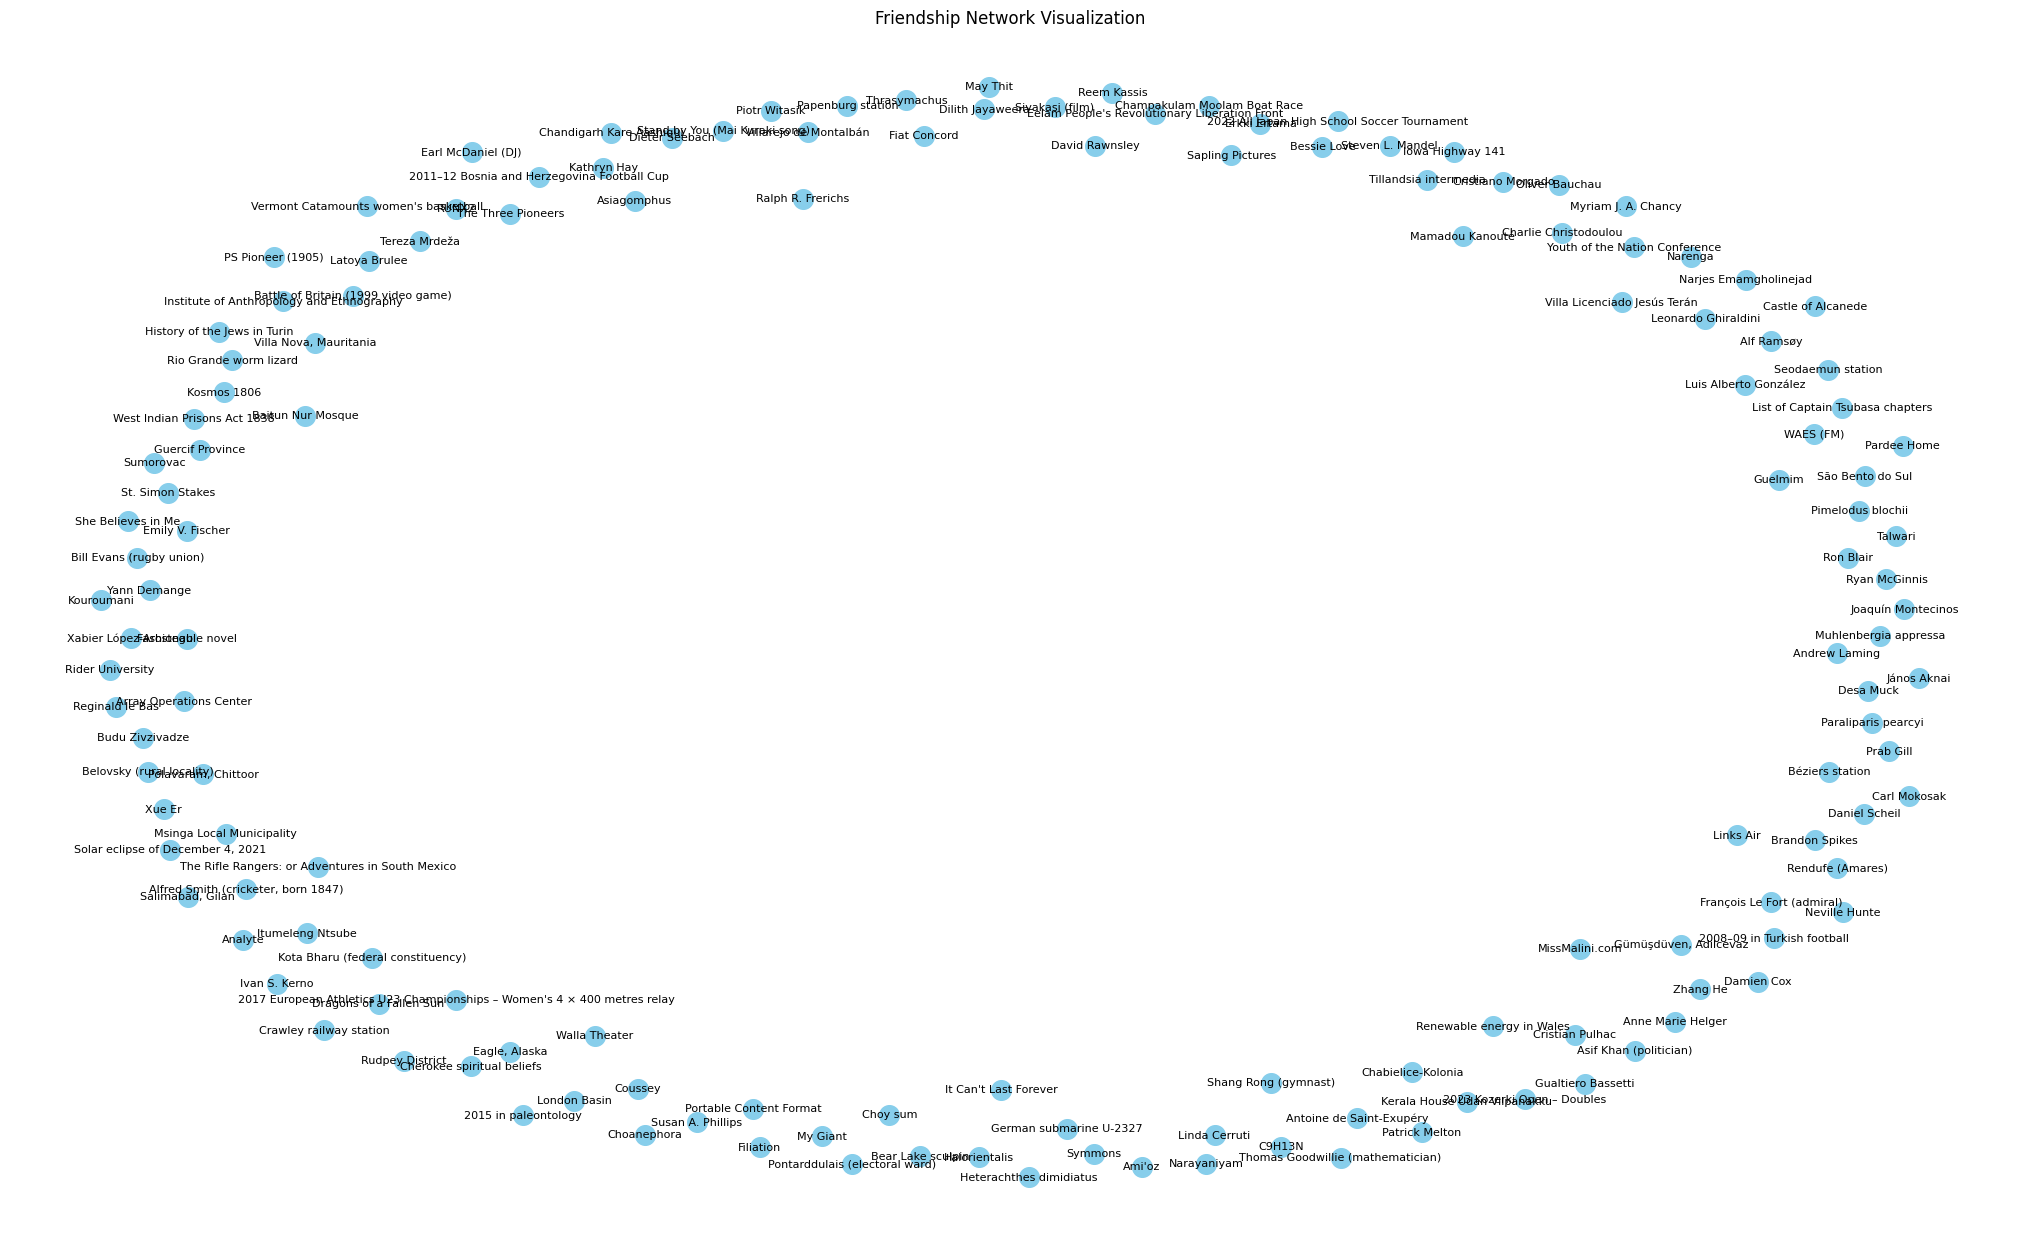

In [81]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the Wikipedia data from the CSV file
df = pd.read_csv('wikipedia_data_extended_150.csv')

# Extract relevant columns for creating the Friendship Network
df_links = df[['Title', 'Links']]

# Create an empty graph for the Friendship Network
friendship_network = nx.Graph()

# Add nodes to the graph (Wikipedia pages)
friendship_network.add_nodes_from(df_links['Title'])

# Iterate over each row and add edges (links) between nodes (Wikipedia pages)
for _, row in df_links.iterrows():
    title = row['Title']
    links = str(row['Links']).split(';')  # Assuming links are separated by ';'
    for link in links:
        if link in df_links['Title'].values:
            friendship_network.add_edge(title, link)

# Visualize the Friendship Network
plt.figure(figsize=(20, 12))
nx.draw(friendship_network, with_labels=True, font_size=8, node_size=200, node_color='skyblue', edge_color='gray')
plt.title('Friendship Network Visualization')
plt.show()


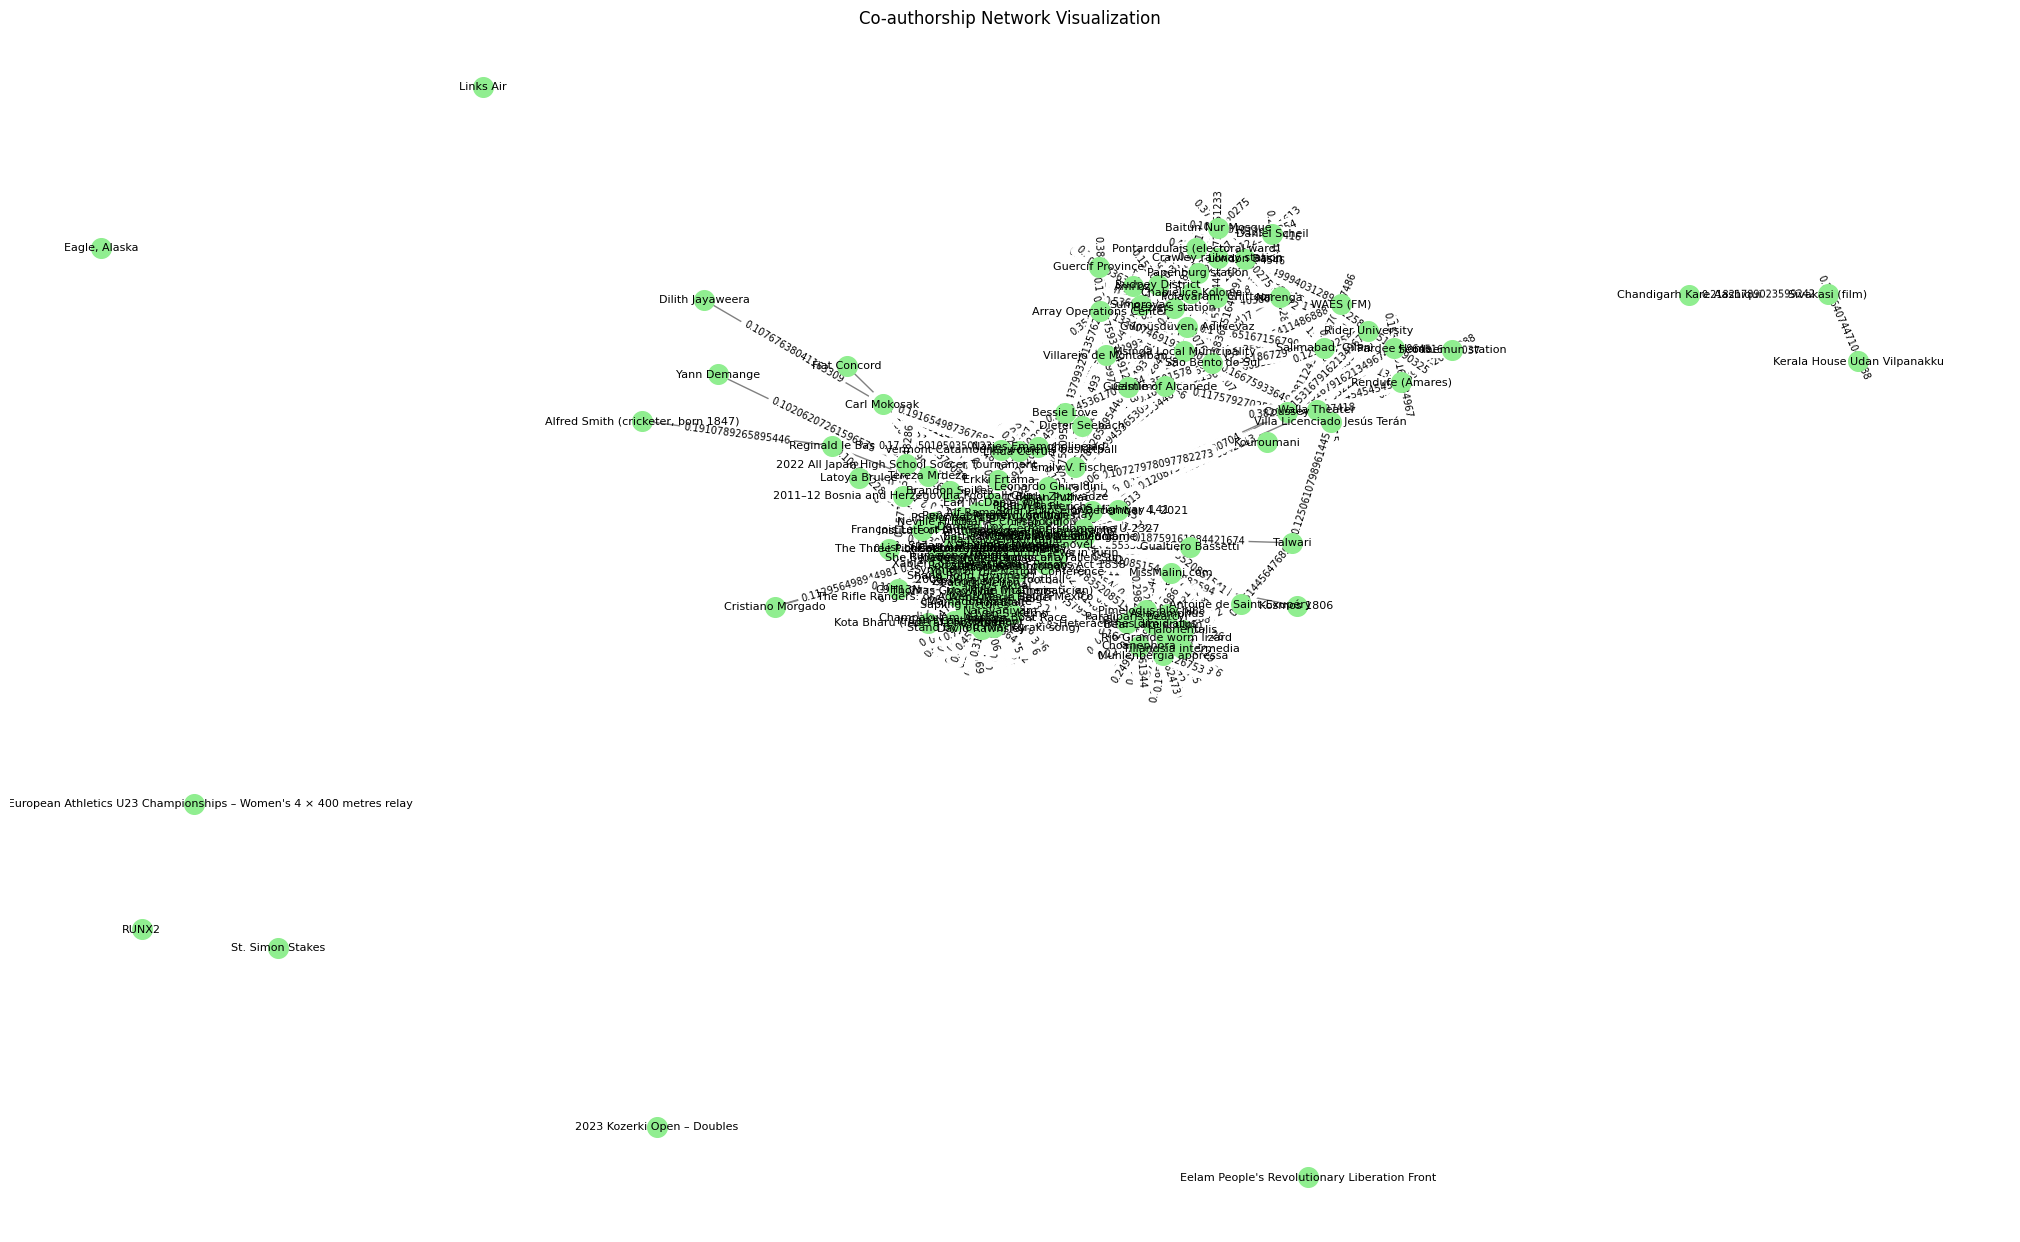

In [93]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the Wikipedia data from the CSV file
df = pd.read_csv('wikipedia_data_extended_150.csv')

# Extract relevant columns for creating the Co-authorship Network
df_coauthors = df[['Title', 'Content']]

# Initialize CountVectorizer for extracting features from text
vectorizer = CountVectorizer()

# Fit and transform the content to obtain feature vectors
content_vectors = vectorizer.fit_transform(df_coauthors['Content'])

# Calculate pairwise cosine similarity between content vectors
cos_sim_matrix = cosine_similarity(content_vectors)

# Create an empty graph for the Co-authorship Network
coauthorship_network = nx.Graph()

# Add nodes to the graph (scientists)
coauthorship_network.add_nodes_from(df_coauthors['Title'])

# Add weighted edges between nodes based on cosine similarity
for i in range(len(df_coauthors)):
    for j in range(i + 1, len(df_coauthors)):
        if cos_sim_matrix[i, j] > 0.1:  # Adjust the threshold as needed
            coauthorship_network.add_edge(df_coauthors.iloc[i]['Title'], df_coauthors.iloc[j]['Title'], weight=cos_sim_matrix[i, j])

# Visualize the Co-authorship Network
plt.figure(figsize=(20, 12))
pos = nx.spring_layout(coauthorship_network, seed=42)  # Positioning nodes for better visualization
nx.draw(coauthorship_network, pos=pos, with_labels=True, font_size=8, node_size=200, node_color='lightgreen', edge_color='gray')
nx.draw_networkx_edge_labels(coauthorship_network, pos=pos, font_size=7, edge_labels=nx.get_edge_attributes(coauthorship_network, 'weight'))
plt.title('Co-authorship Network Visualization')
plt.show()


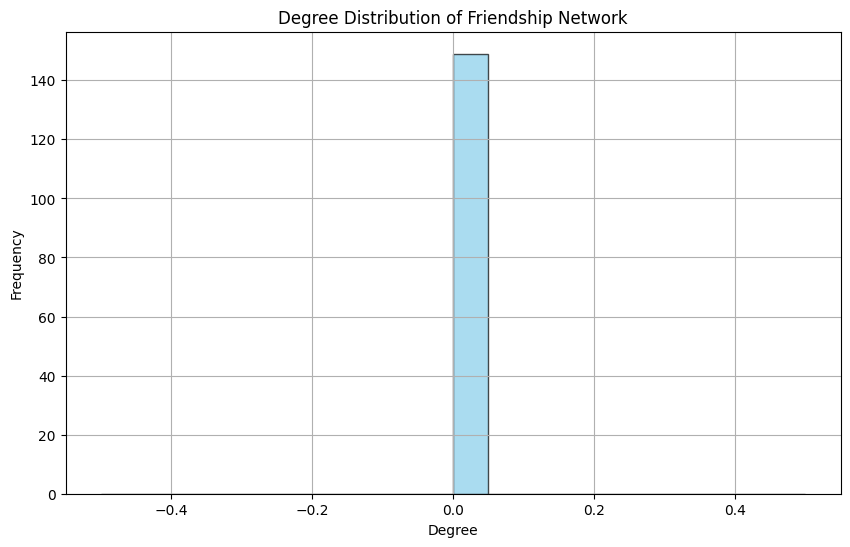

Network Measures:
Degree Distribution: {'Latoya Brulee': 0, 'Kathryn Hay': 0, 'Xue Er': 0, 'Chandigarh Kare Aashiqui': 0, 'Solar eclipse of December 4, 2021': 0, 'The Three Pioneers': 0, 'May Thit': 0, 'Kota Bharu (federal constituency)': 0, 'Tillandsia intermedia': 0, 'Itumeleng Ntsube': 0, "Eelam People's Revolutionary Liberation Front": 0, 'Cherokee spiritual beliefs': 0, 'Andrew Laming': 0, 'Dieter Seebach': 0, "Ami'oz": 0, '2008–09 in Turkish football': 0, 'Brandon Spikes': 0, 'Yann Demange': 0, 'German submarine U-2327': 0, 'Erkki Ertama': 0, 'Narenga': 0, 'Tereza Mrdeža': 0, 'Charlie Christodoulou': 0, 'Links Air': 0, 'Guercif Province': 0, 'David Rawnsley': 0, 'Kosmos 1806': 0, 'Papenburg station': 0, 'RUNX2': 0, 'Luis Alberto González': 0, '2023 Kozerki Open – Doubles': 0, 'WAES (FM)': 0, 'Sumorovac': 0, 'Heterachthes dimidiatus': 0, 'Villarejo de Montalbán': 0, 'Polavaram, Chittoor': 0, 'François Le Fort (admiral)': 0, 'Fiat Concord': 0, 'Stand by You (Mai Kuraki song)': 0, '

In [94]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the Wikipedia data from the CSV file
df = pd.read_csv('wikipedia_data_extended_150.csv')

# Extract relevant columns for creating the Friendship Network
df_links = df[['Title', 'Links']]

# Create an empty graph for the Friendship Network
friendship_network = nx.Graph()

# Add nodes to the graph (Wikipedia pages)
friendship_network.add_nodes_from(df_links['Title'])

# Iterate over each row and add edges (links) between nodes (Wikipedia pages)
for _, row in df_links.iterrows():
    title = row['Title']
    links = str(row['Links']).split(';')  # Assuming links are separated by ';'
    for link in links:
        if link in df_links['Title'].values:
            friendship_network.add_edge(title, link)

# Compute degree distribution
degree_distribution = dict(friendship_network.degree())

# Plot degree distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution.values(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Degree Distribution of Friendship Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Compute clustering coefficient
clustering_coefficient = nx.average_clustering(friendship_network)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(friendship_network)

# Report on network measures
print("Network Measures:")
print("Degree Distribution:", degree_distribution)
print("Average Clustering Coefficient:", clustering_coefficient)
print("Betweenness Centrality:", betweenness_centrality)
